# Project 1
### Author: Lexi Shewchuk
### Date: Saturday, 17 July

In [1]:
import sklearn.linear_model as lm
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random

## Part 1: Logistic Regression for Digit Classification
The goal of this part is to train a logistic regression model that can take in 28x28 pixel greyscale images of handwritten 8s and 9s, and identiies each image as an 8 or a 9. A logistic regression model is trained on the given train data-digits_8_vs_9_noisy dataset. Several model hyperparameters were altered and used to generate different models in order to find a model that correctly classifies the training data.

### 1.1: Fit logistic regression models and explore different max_iter values

In [2]:
# load in the datasets and turn into ndarrays
# make y data into 1D arrays using ravel()
x_train = pd.read_csv('data_digits_8_vs_9_noisy/x_train.csv').to_numpy()
y_train = pd.read_csv('data_digits_8_vs_9_noisy/y_train.csv').to_numpy().ravel()
x_test = pd.read_csv('data_digits_8_vs_9_noisy/x_test.csv').to_numpy()
y_test = pd.read_csv('data_digits_8_vs_9_noisy/y_test.csv').to_numpy().ravel()

# explore what happens with varying max_iter values
# keep track of accuracy and log loss
accuracy = list()
log_losses = list()
models = list()

# create logistic regression models and train on x_train data
# all params are default except solver = 'liblinear' and max_iter
# for small max_iter (<10), liblinear will fail to converge
iter_values = list(range(1, 41, 1))
for i in iter_values:
    log_model = lm.LogisticRegression(solver='liblinear', max_iter=i)
    log_model.fit(x_train, y_train)
    y_test_pred = log_model.predict(x_test)
    accuracy.append(log_model.score(x_test, y_test))
    log_losses.append(metrics.log_loss(y_test, y_test_pred))
    models.append(log_model)

C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning

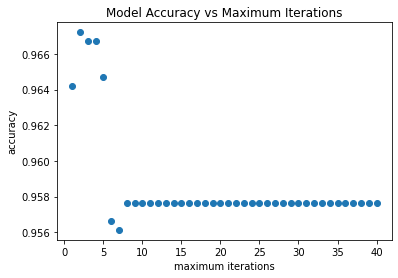

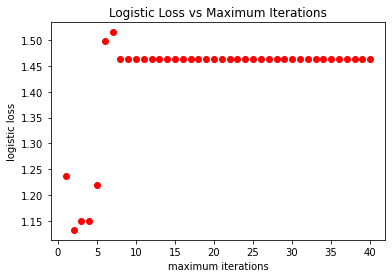

In [3]:
# plot accuracy
plt.title('Model Accuracy vs Maximum Iterations')
plt.xlabel('maximum iterations')
plt.ylabel('accuracy')
plt.scatter(iter_values, accuracy)
plt.show()

# plot error
plt.title('Logistic Loss vs Maximum Iterations')
plt.xlabel('maximum iterations')
plt.ylabel('logistic loss')
plt.scatter(iter_values, log_losses, c='r')
plt.show()

### Discussion:
The above plots demonstrate that at the maximum interations increase, accuracy increases and loss decreases. For logistic regression, a model is trained by adjusting weights to minimize error on a given datum. When the number of iterations that the model is allowed to undergo is low (making the step size alpha larger), the amount of adjustement -- and therefore fitting -- decreases. This often prevents the loss from reaching a minimum, meaning that the model isn't as accurate as it could be.
Log loss and accuracy are very closely related. Log loss is reduced by labeling positive examples as closer to 1, and negative examples as closer to 0 -- in other words, an accurately labeled datum reduces loss.

-0.4406741259523888


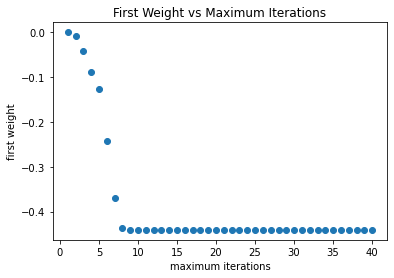

In [4]:
## 1.2: 
# get the first weight for all 40 models
coeffs = list()
for model in models:
    coeffs.append(model.coef_[0, 0])
print(coeffs[38])
# plot first weight vs iter value
plt.title('First Weight vs Maximum Iterations')
plt.xlabel('maximum iterations')
plt.ylabel('first weight')
plt.scatter(iter_values, coeffs);    

### Discussion:
This plot demonstrates that increasing the number of iterations allows for the weights to adjust more, and the ideal weight applied to pixel000 should be about -0.44 for the most accurate model. Initally, because max_iter is set so low, the model isn't able to sufficiently adjust weight and actually fit the training data, so the inital weight on the first pixel is nearer to zero.
It's likely that the model determines that the first pixel, which would lie in the top left corner of the image, shouldn't have a great deal of sway in the determination of the digit, so if there is a relatively high value for that pixel, it shouldn't contribute greatly to the classification. 

In [5]:
# 1.3
c_grid = np.logspace(-9, 6, 31)
min_loss = 10_000_000
best_model = lm.LogisticRegression()

# smaller C means larger penalty (stronger regularization)
for c in c_grid:
    model = lm.LogisticRegression(solver='liblinear', C=c)
    model.fit(x_train, y_train)
    loss = metrics.log_loss(y_test, model.predict(x_test))
    if loss < min_loss:
        print(min_loss, '-->', loss)
        best_model = model
        min_loss = loss
y_test_pred = best_model.predict(x_test)

10000000 --> 6.305112785755183
6.305112785755183 --> 6.183190730906785
6.183190730906785 --> 5.8174253728138625
5.8174253728138625 --> 4.911720292558877
4.911720292558877 --> 3.4138227776949504
3.4138227776949504 --> 2.333948978536747
2.333948978536747 --> 2.0726942872773684
2.0726942872773684 --> 1.7765990780382406
1.7765990780382406 --> 1.6198417471498763
1.6198417471498763 --> 1.2889068263832728
1.2889068263832728 --> 1.2192358710772047
1.2192358710772047 --> 1.1669827554041876
1.1669827554041876 --> 1.1321462696858104
1.1321462696858104 --> 1.1147288332788965


Least loss: 1.1147288332788965
Best model's accuracy: 0.967725668179526


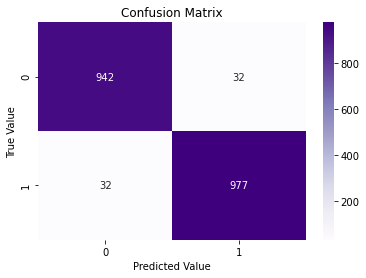

In [6]:
print("Least loss:", min_loss)
print("Best model's accuracy:", best_model.score(x_test, y_test))

# generate confusion matrix for best model
conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
sb.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show();


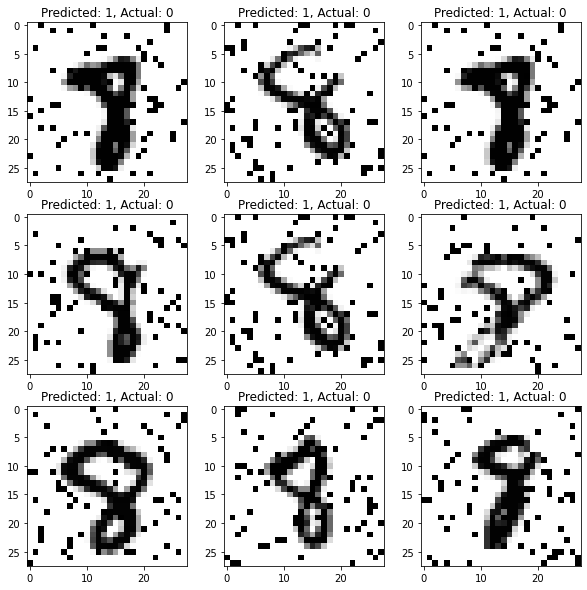

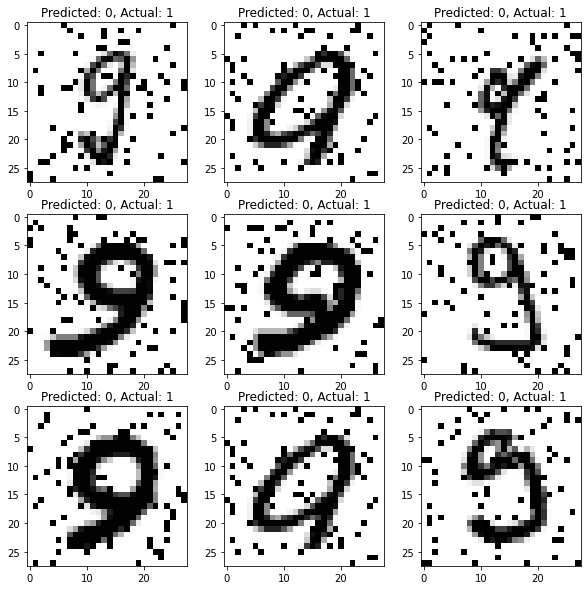

In [7]:
# 1.4

# get lists of false positives and false negatives
false_pos = list()
false_neg = list()
for i in range(len(x_test)):
    if y_test[i] == 1 and y_test_pred[i] == 0:
        false_neg.append(x_test[i])
    elif y_test[i] == 0 and y_test_pred[i] == 1:
        false_pos.append(x_test[i])

# plot 9 random false positives
plt.figure(figsize=(10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    rand_num = random.randrange(0, len(false_pos))
    plt.imshow(false_pos[rand_num].reshape(28, -1), cmap='Greys', vmin=0.0, vmax=1.0)
    plt.title('Predicted: 1, Actual: 0')
plt.show()

# plot 9 random false negatives
plt.figure(figsize=(10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    rand_num = random.randrange(0, len(false_neg))
    plt.imshow(false_neg[rand_num].reshape(28, -1), cmap='Greys', vmin=0.0, vmax=1.0)
    plt.title('Predicted: 0, Actual: 1')
plt.show()


# plot all the fase negative examples
# plt.figure(figsize=(20, 20))
# for i in range(len(false_neg)):
#     plt.subplot(len(false_neg) // 4, 5, i + 1)
#     plt.imshow(false_neg[i].reshape(28, -1), cmap='Greys', vmin=0.0, vmax=1.0)
#     plt.title('Predicted: 0, Actual: 1')
# plt.show()

For false positives, which in my case means 8s that have been mislabeled as 9s, many have a bottom loop that's very skinny or they're tilted right a bit. This makes sense because most 9s can be identified by having a stick at the base rather than a loop, so a skinny bottom would resemble a 9.
False negatives -- 9s that have been mislabelled as 8s -- often have very loopy or wide tails, similar to the base of an 8. 

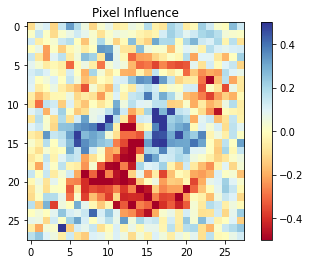

In [8]:
# 1.5
coeffs = np.array(best_model.coef_).reshape(28,28)

plt.title('Pixel Influence')
plt.imshow(coeffs, cmap='RdYlBu', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.show()

This colormap shows that the pixels most commonly found in 8s -- and thus have the most influence in classifying the example as an 8 -- are centered around (13,20), and follow a curvy crescent shape that you would see from at the base of a typical handwritten 8.
The pixels that are most influential in determining a 9 are around (17,12), where the joint between the circle and stick of a 9 would be.
This colormap provides some insight into the shapes of numbers that are misclassified. False negatives -- 9s that are labeled 8s -- often have loopy bottoms that go through the very negative-pixel region. False postives -- true 8s labeled as 9s -- often have a dense area where the joint of a 9 would be, and thus have more positive weights at those pixel locations.

## Part 2: Shirt Classification

In [17]:
# load in the datasets
x_train = pd.read_csv('data_shirts/train_shirt_x.csv').to_numpy()
y_train = pd.read_csv('data_shirts/train_shirt_y.csv').to_numpy().ravel()
x_test = pd.read_csv('data_shirts/test_shirt_x.csv').to_numpy()

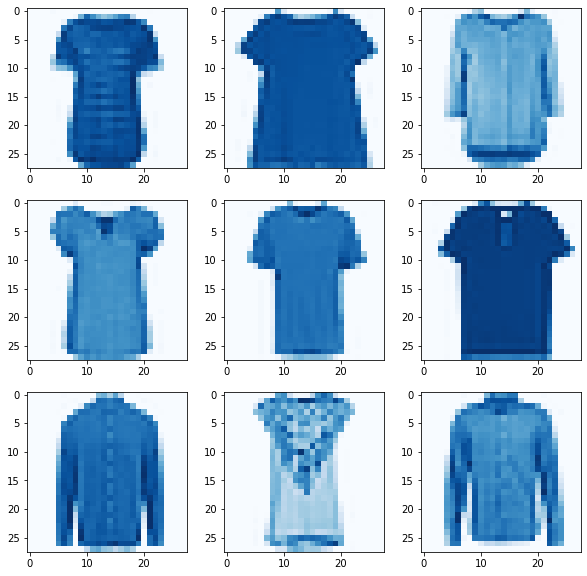

In [25]:
# look at some of the images
plt.figure(figsize=(10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    rand_num = random.randrange(0, len(x_train))
    datum = x_train[rand_num].reshape(28, -1)
    plt.imshow(datum, cmap='Blues', vmin=0.0, vmax=1.0)
plt.show()

In [34]:
def acc(model, x, y):
    return model.score(x, y)

def loss(y, y_pred):
    return metrics.log_loss(y, y_pred)

In [35]:
# train a basic logistic regression model
model = lm.LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
print('acc: ', acc(model, x_train, y_train))
print('loss:', loss(y_train, y_train_pred))

acc:  0.8869166666666667
loss: 3.905811604658517


In [ ]:
# look at where the mistakes are 

In [36]:
# change C
model = lm.LogisticRegression()
c_grid = np.logspace(-9, 6, 31)
min_loss = 10_000_000

for c in c_grid:
    c_model = lm.LogisticRegression(solver='liblinear', C=c)
    c_model.fit(x_train, y_train)
    c_loss = loss(y_train, c_model.predict(x_train))
    if c_loss < min_loss:
        model = c_model
        min_loss = c_loss

In [ ]:
print('acc: ', acc(model, x_train, y_train))
print('loss:', loss(y_train, y_train_pred))